#####kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills Creative feature engineering Advanced regression techniques like random forest and gradient boosting

Goal It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading train and test dataset #

df = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [4]:
# Temporal Variables/ Datetime Variables

Yr_features = [features for features in train_data.columns if 'Yr' in features or 'Year' in features]
print('Number of Temporal Variables:', len(Yr_features))
train_data[Yr_features].head()

Number of Temporal Variables: 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [5]:
train_data.shape

(1460, 81)

In [6]:
# Numerical features #

numerical_features = [f for f in train_data.columns if train_data[f].dtypes != 'O']
len(numerical_features)

38

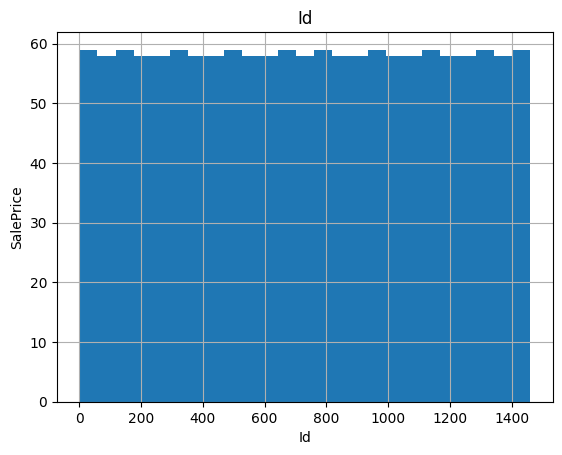

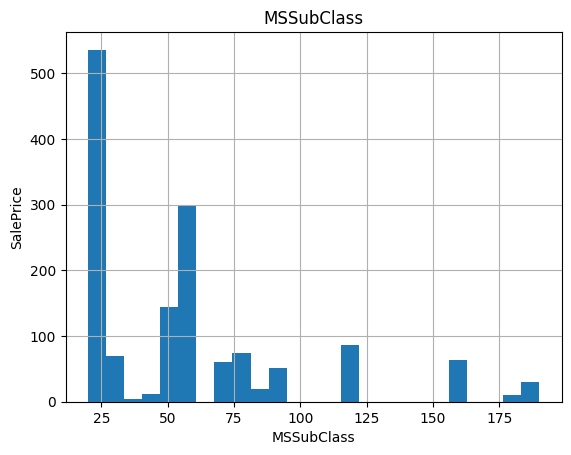

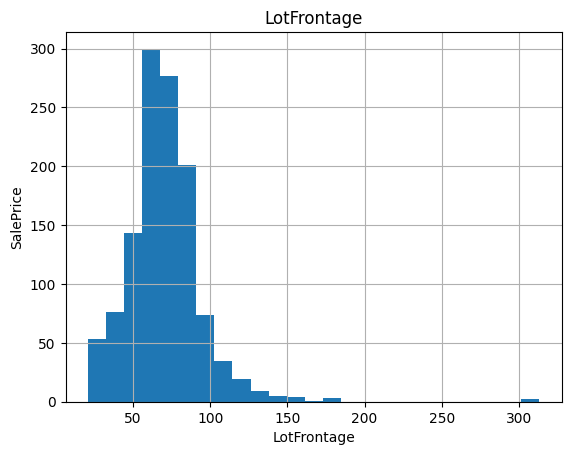

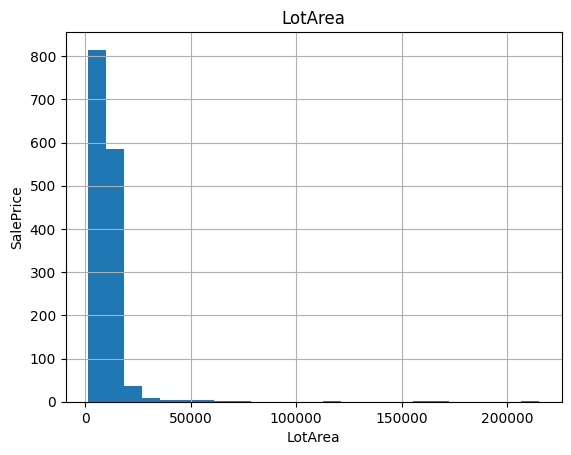

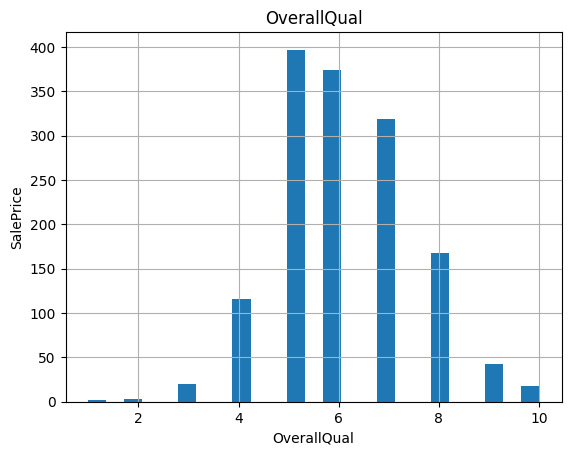

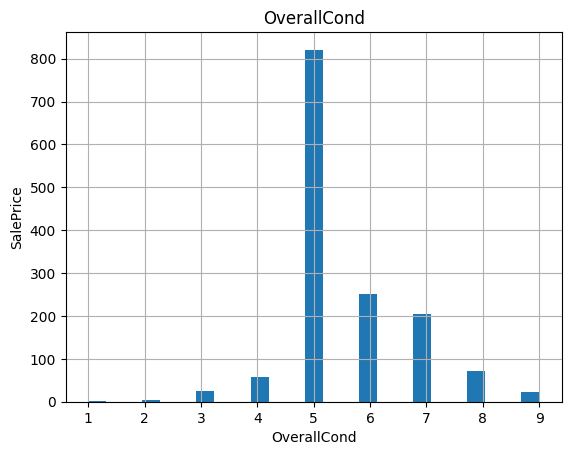

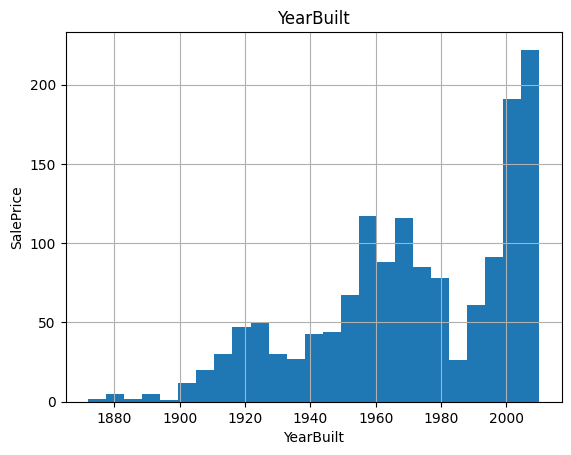

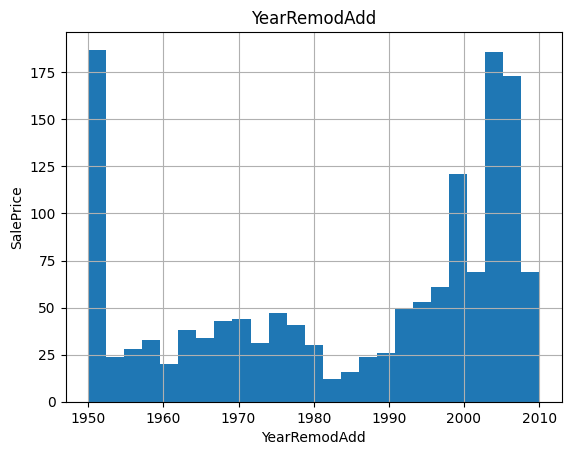

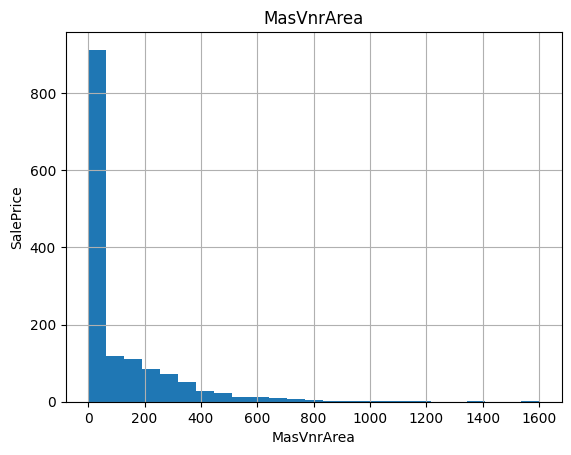

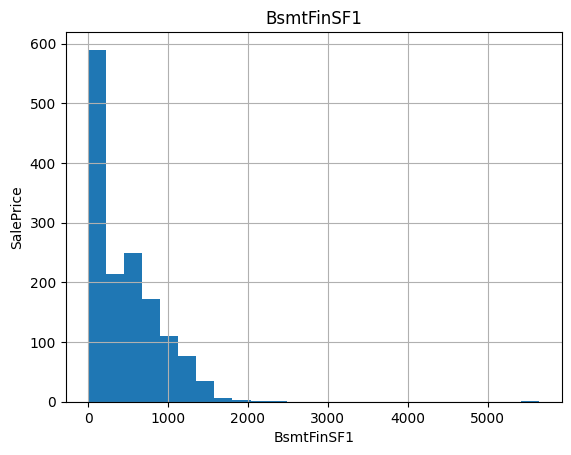

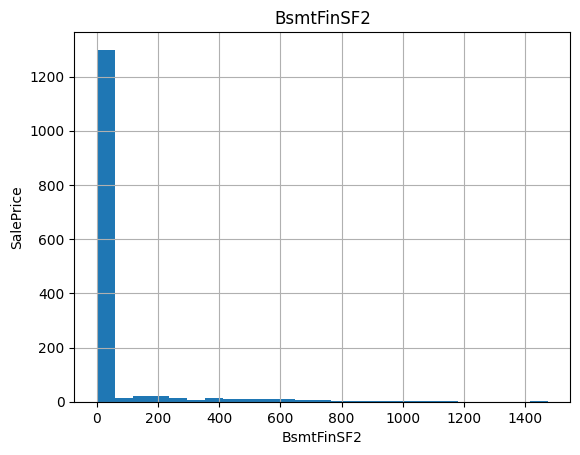

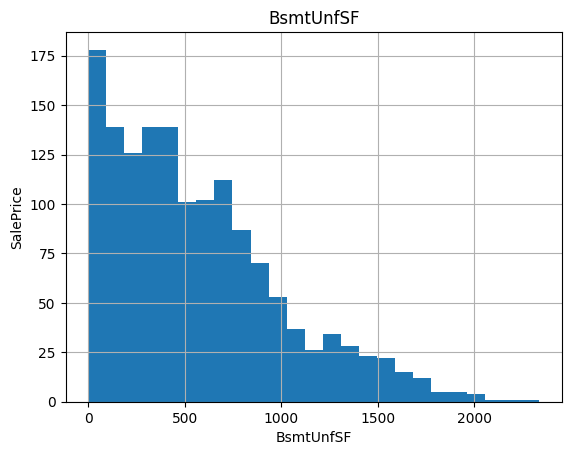

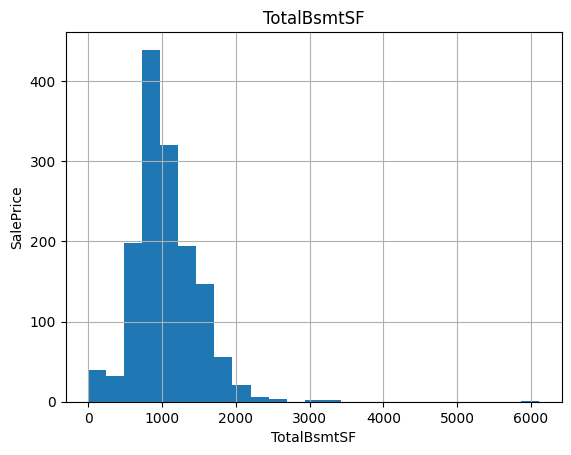

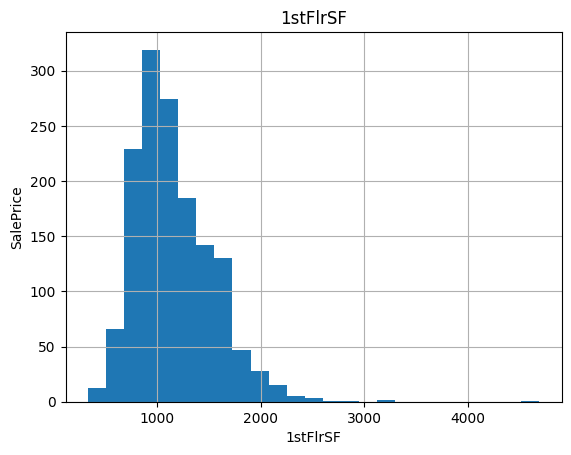

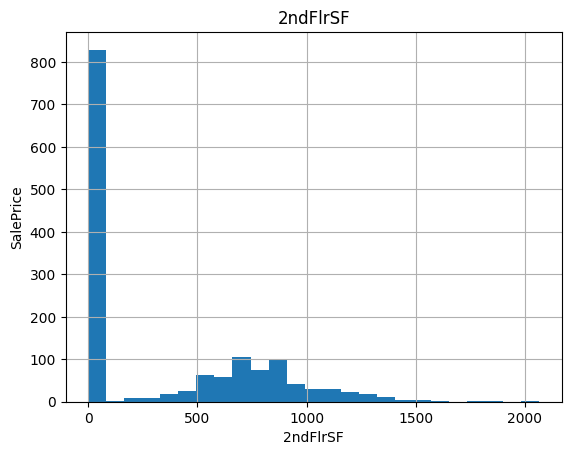

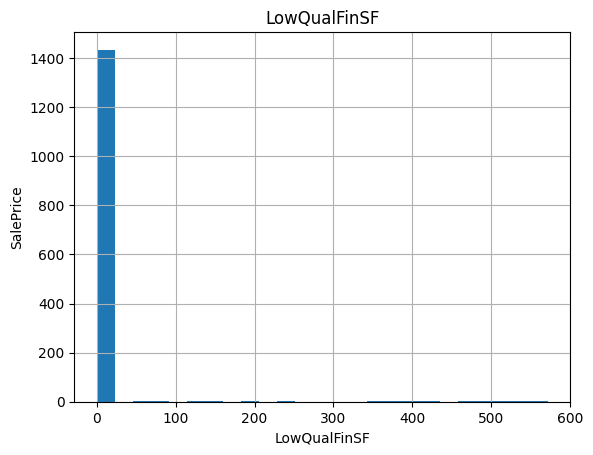

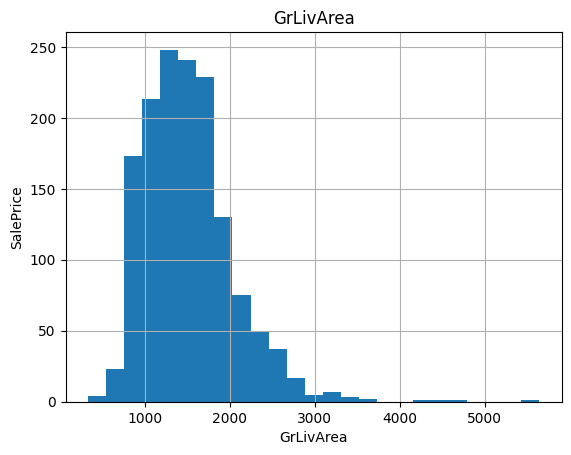

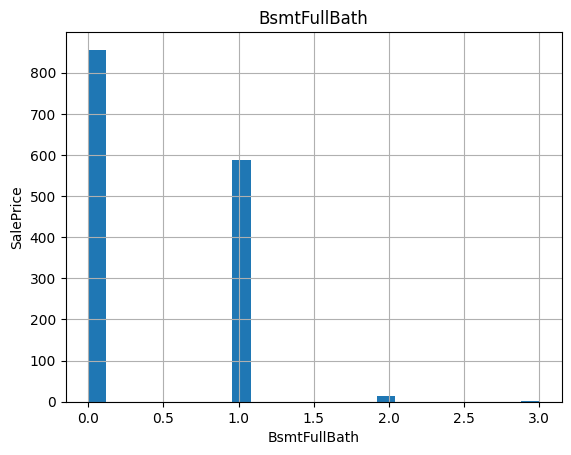

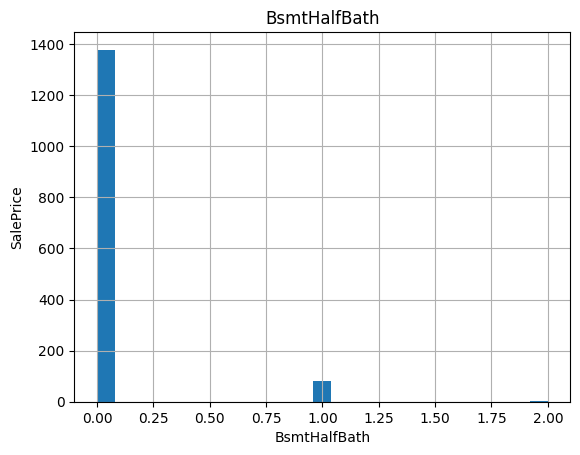

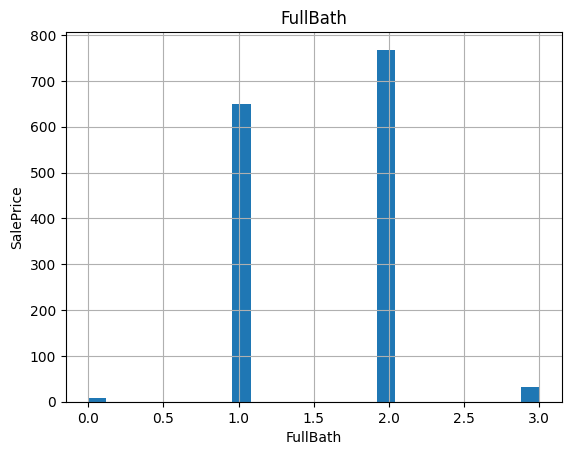

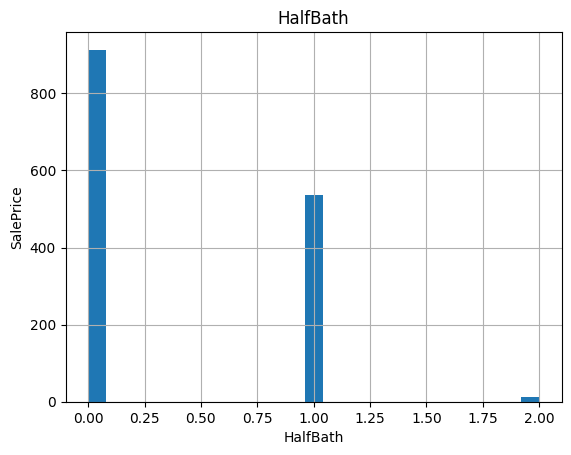

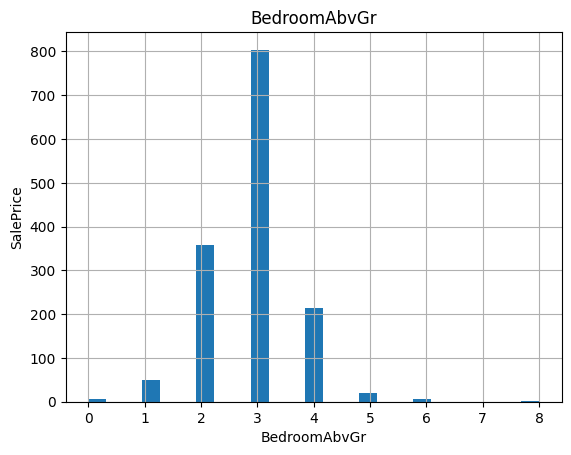

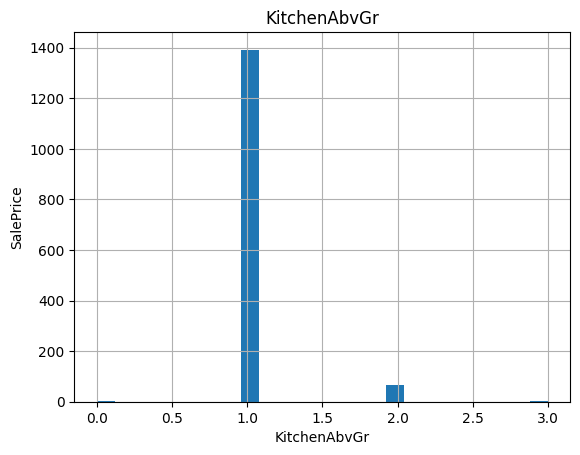

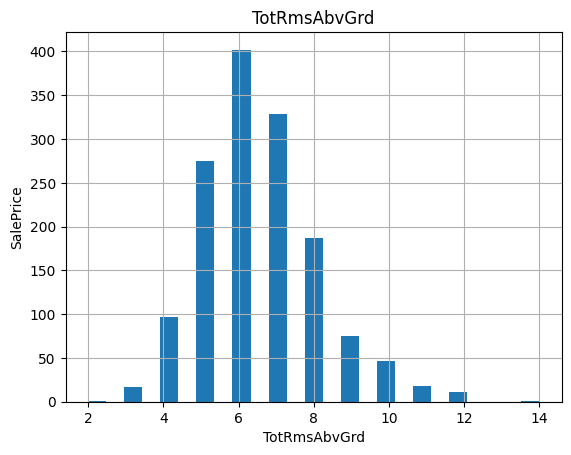

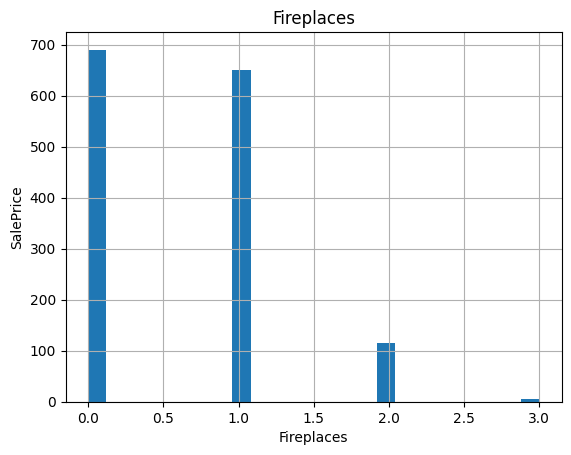

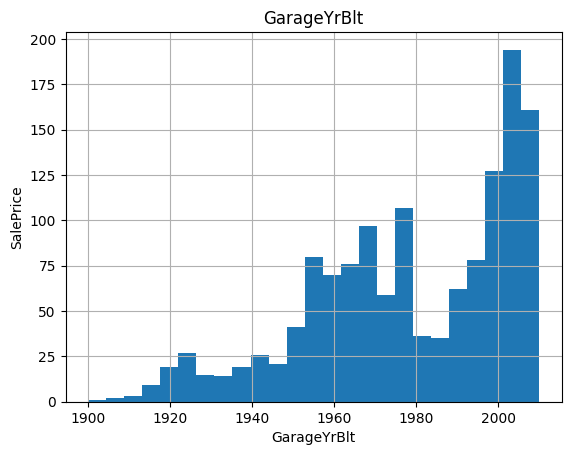

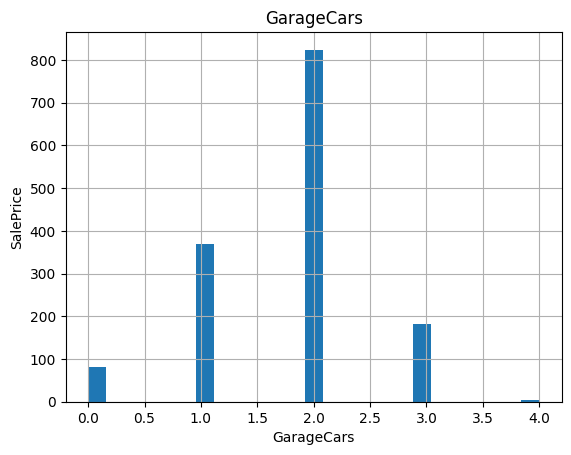

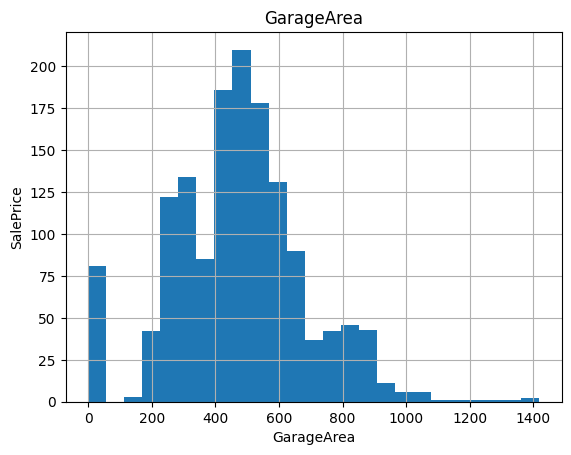

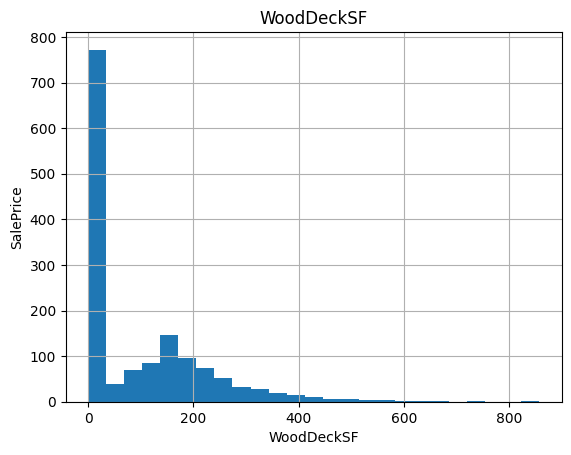

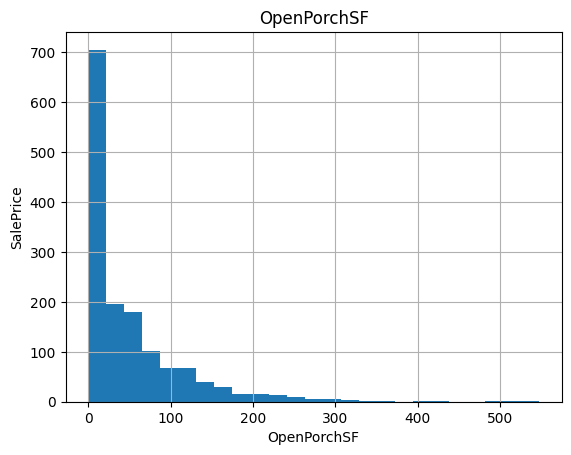

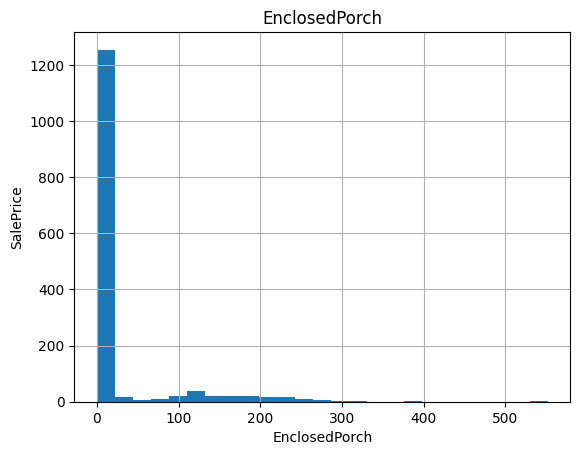

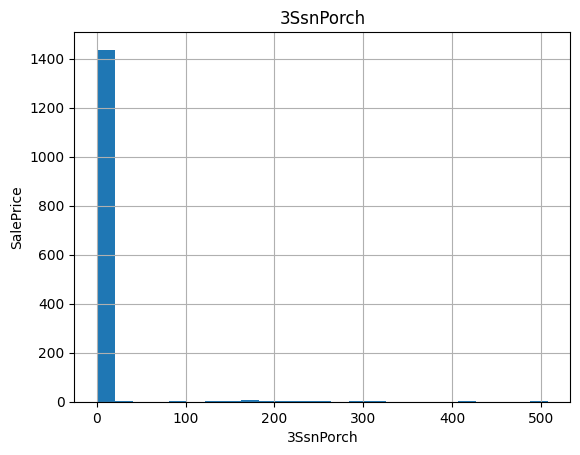

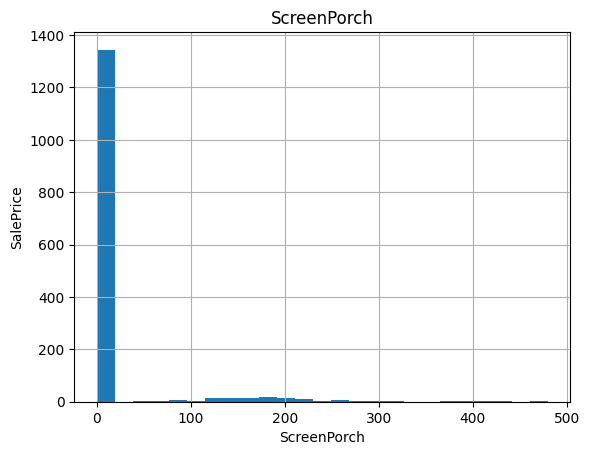

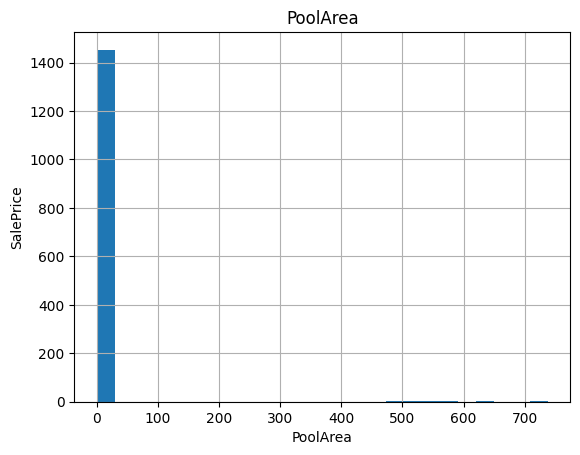

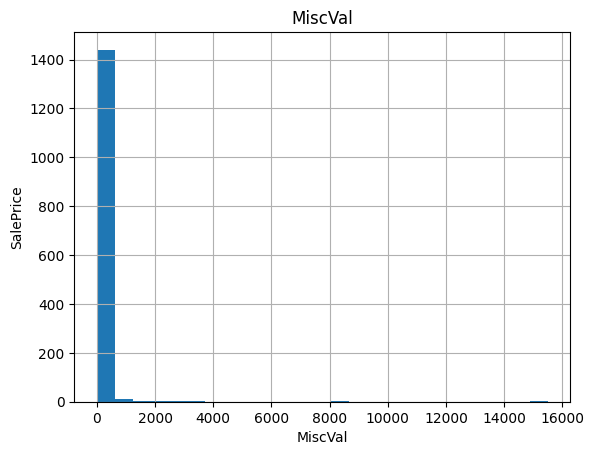

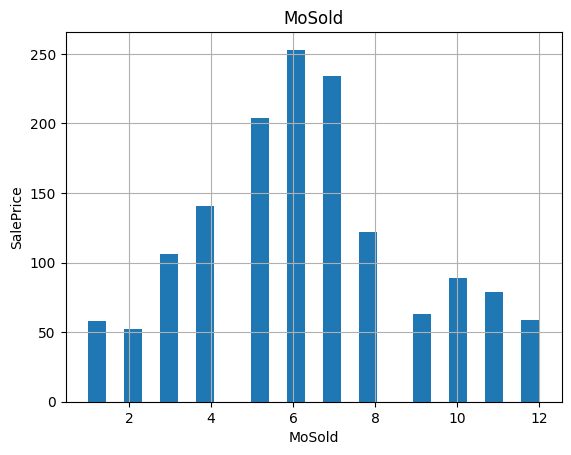

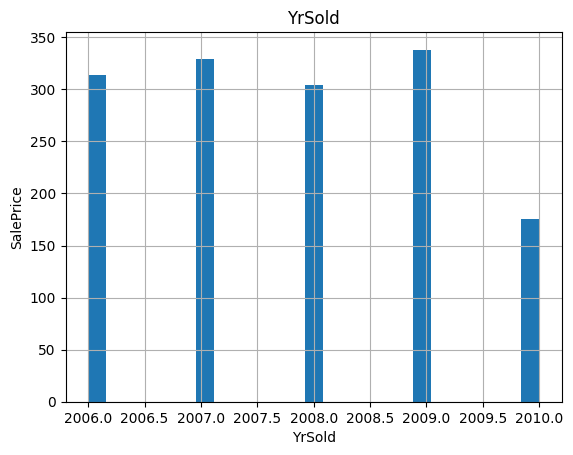

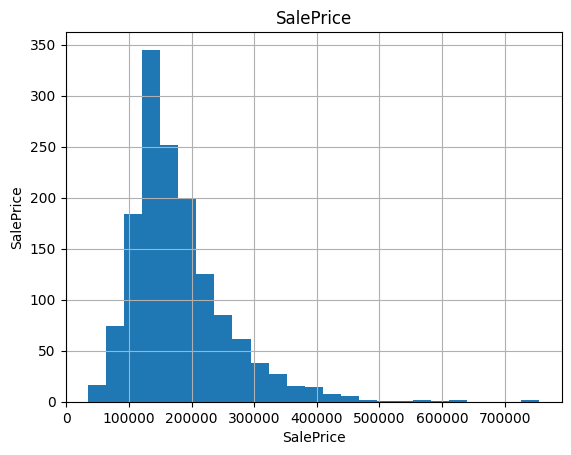

In [7]:
############### Numerical Features ################################
for feature in numerical_features:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [8]:
# Categorical features #

categorical_features = [f for f in train_data.columns if train_data[f].dtypes == 'O']
len(categorical_features)

43

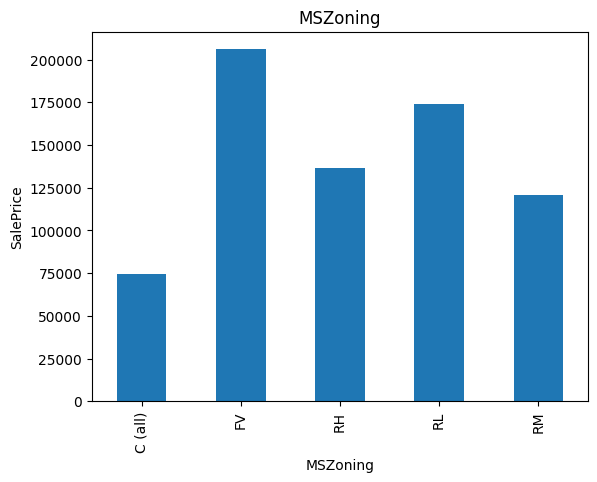

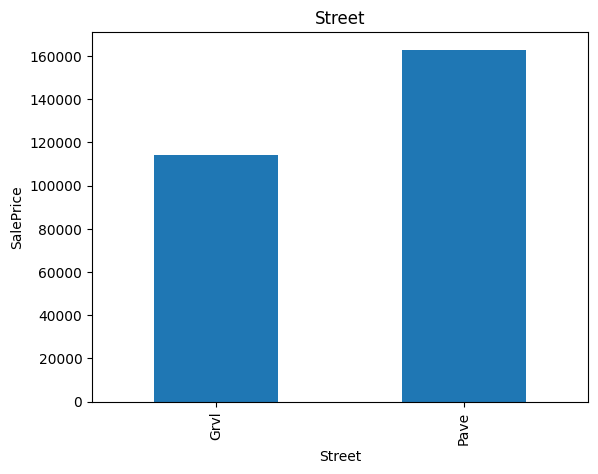

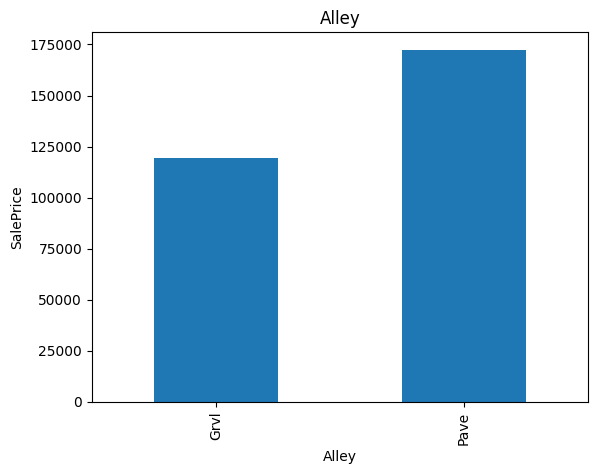

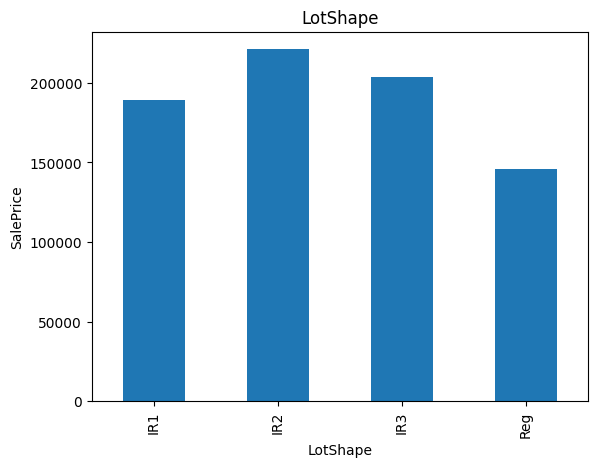

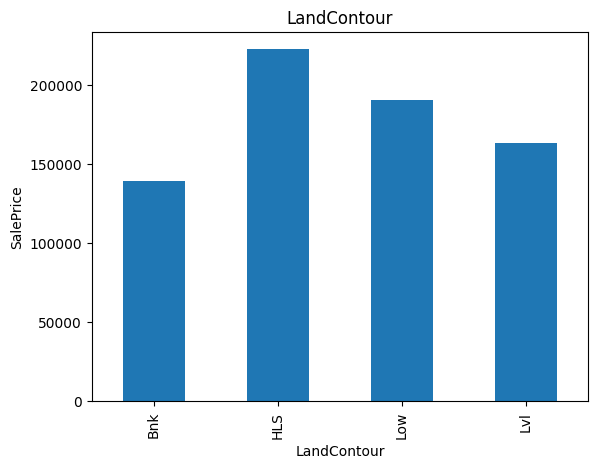

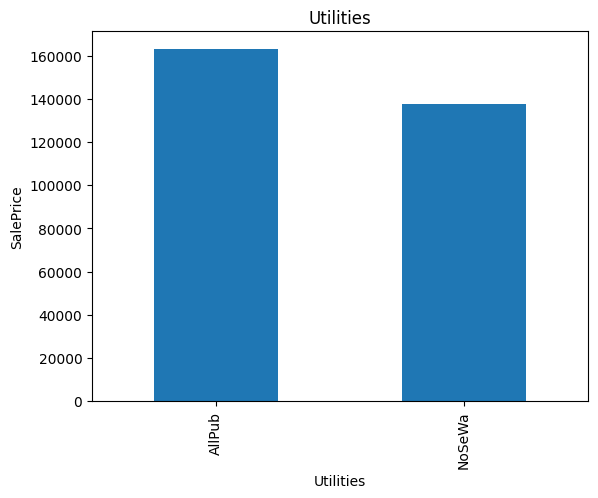

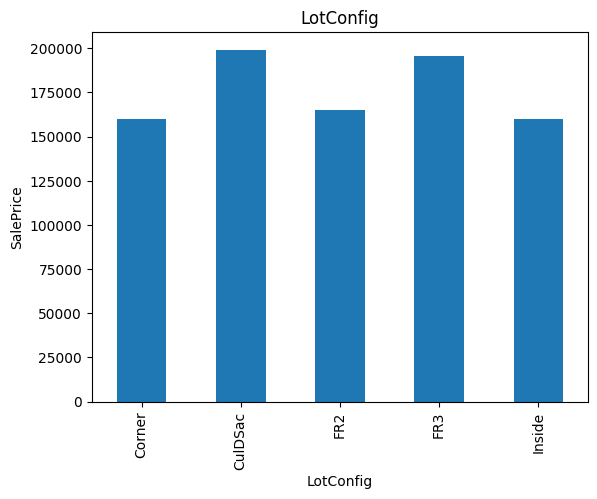

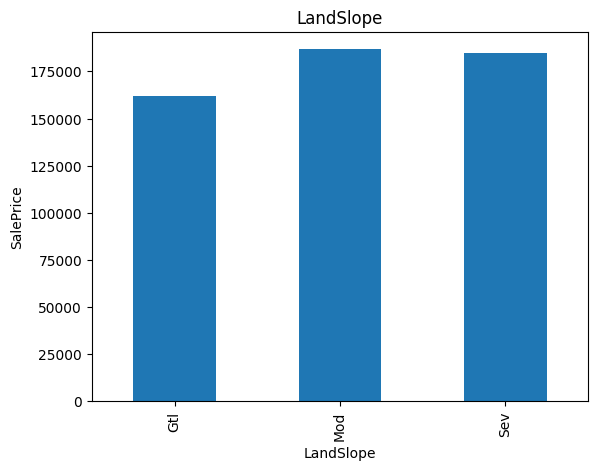

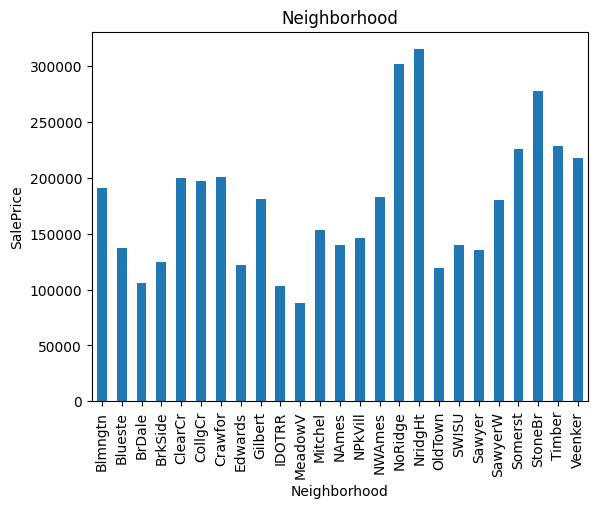

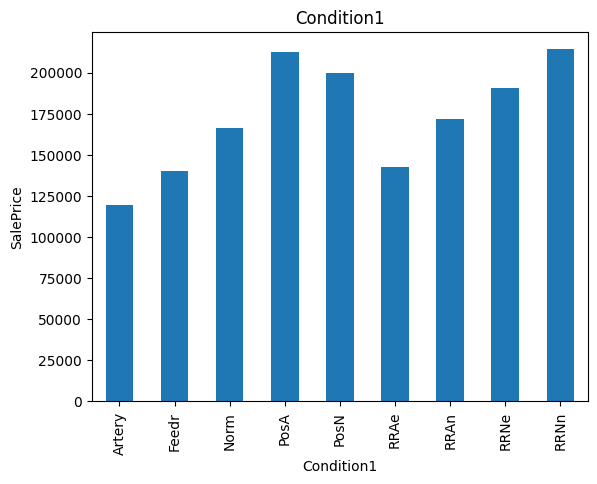

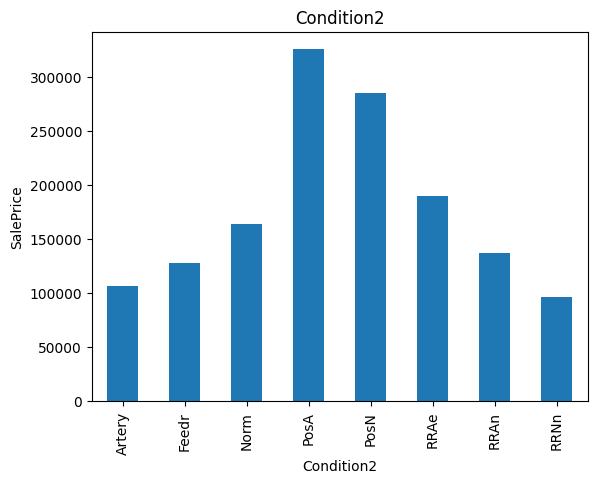

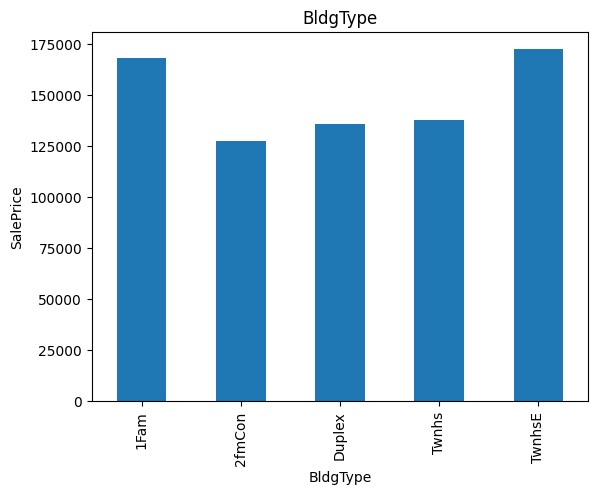

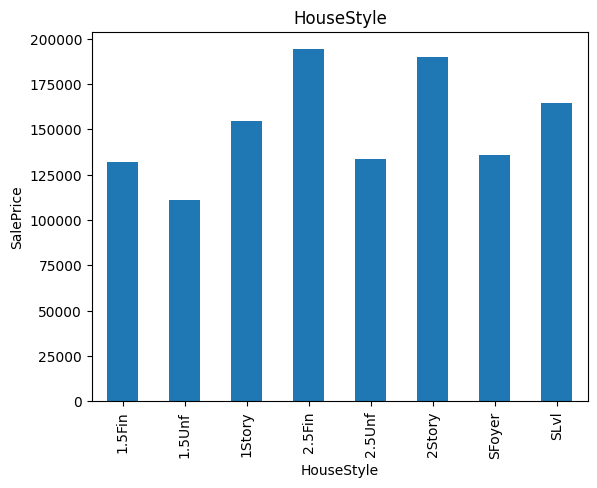

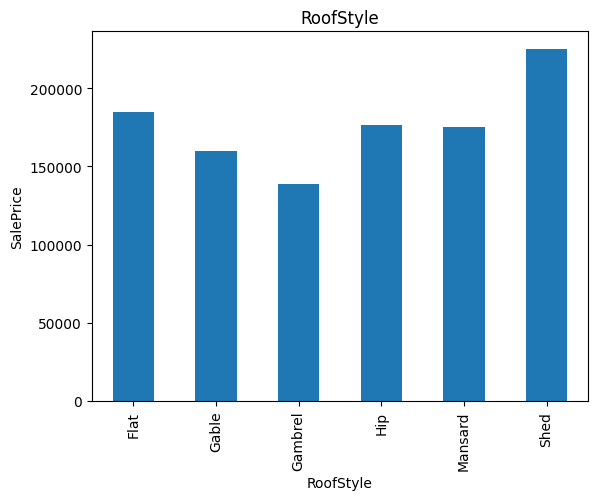

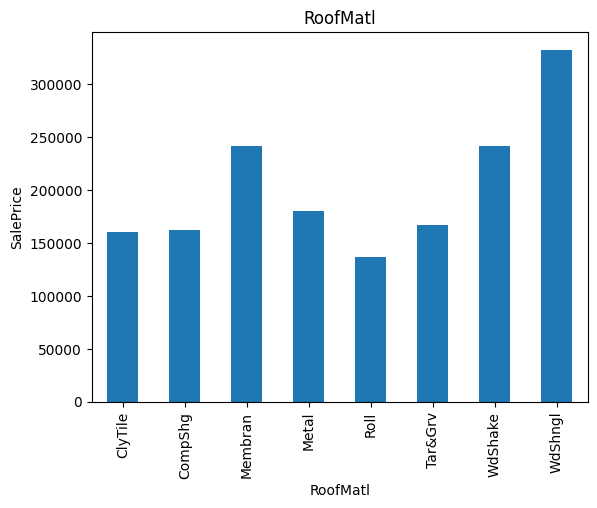

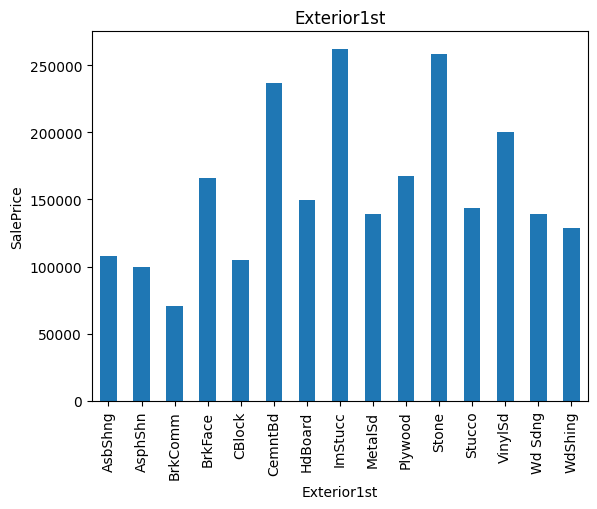

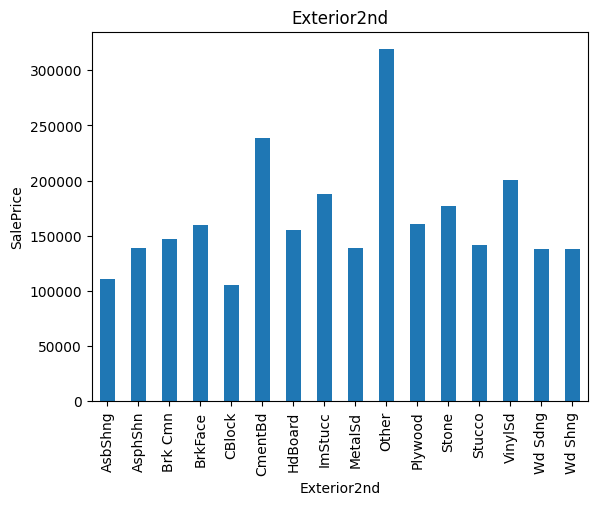

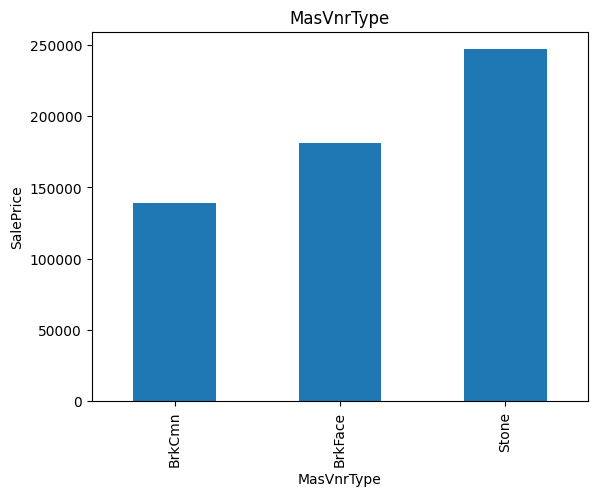

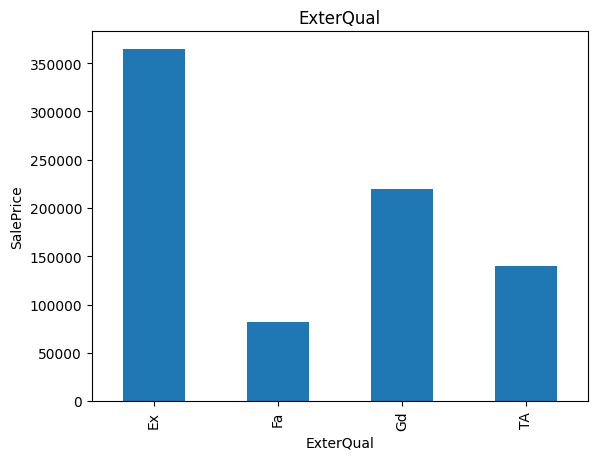

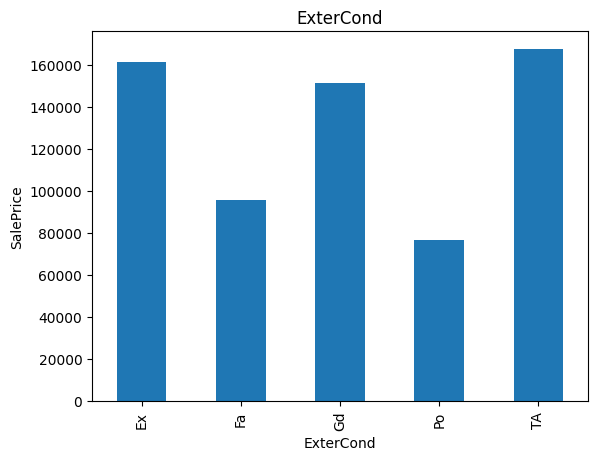

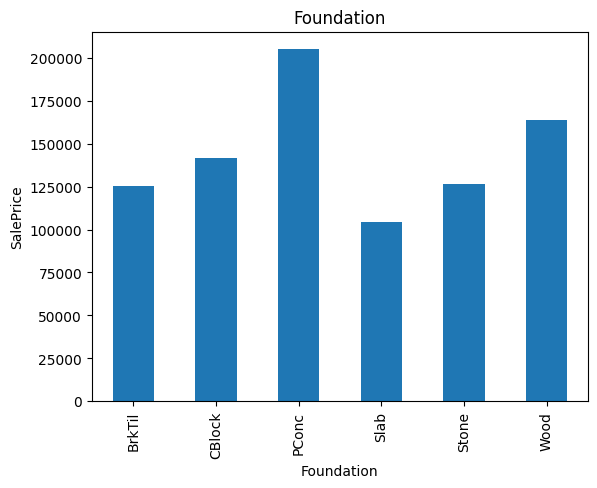

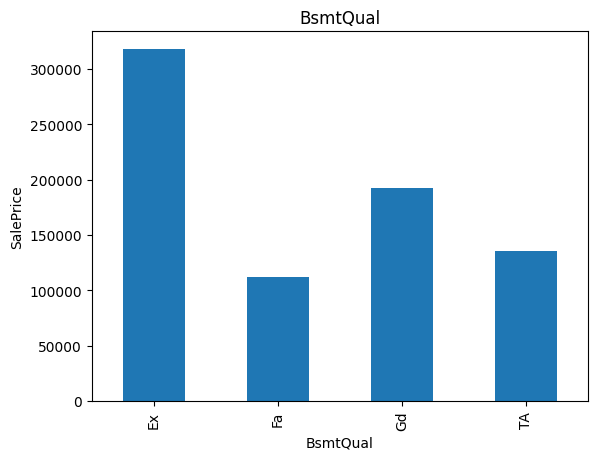

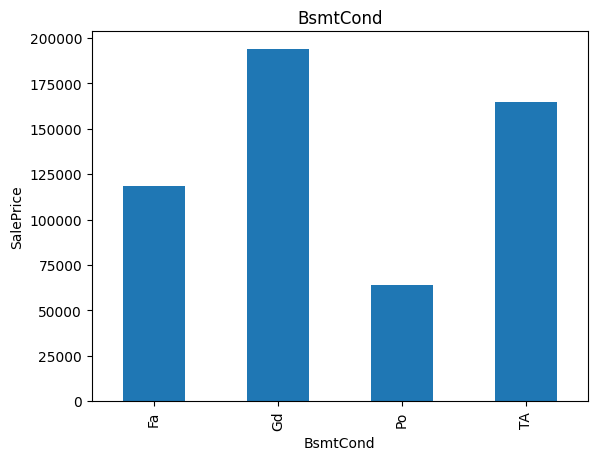

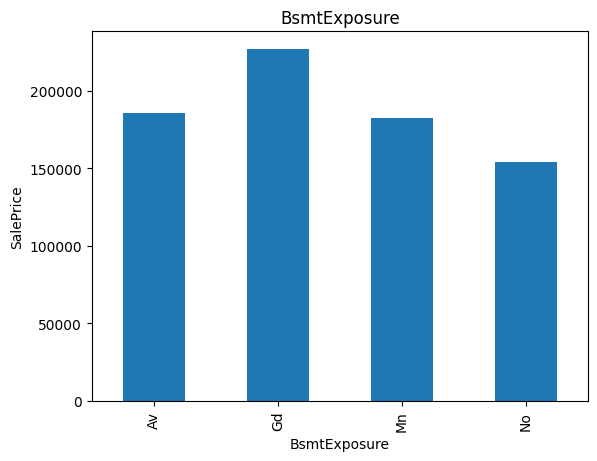

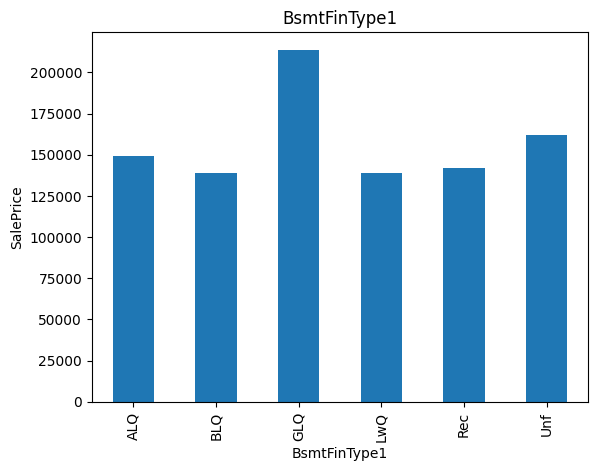

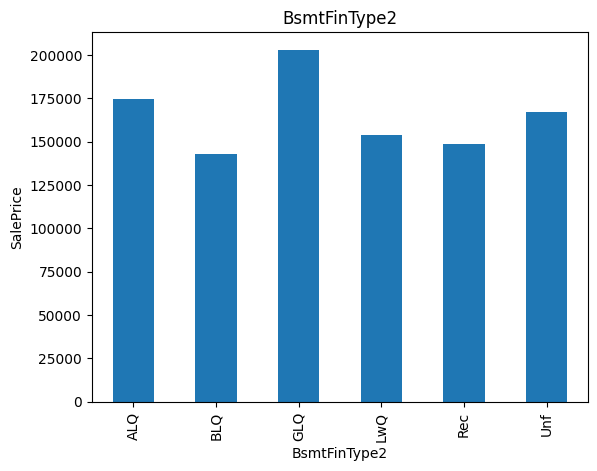

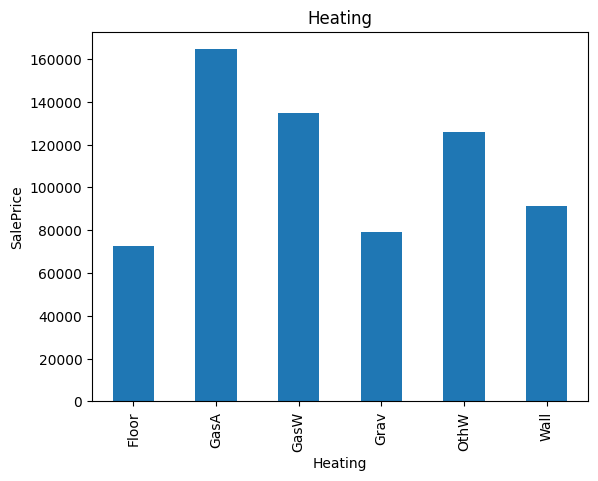

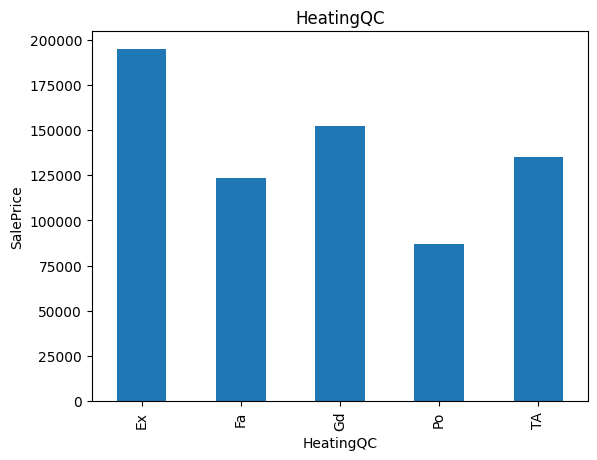

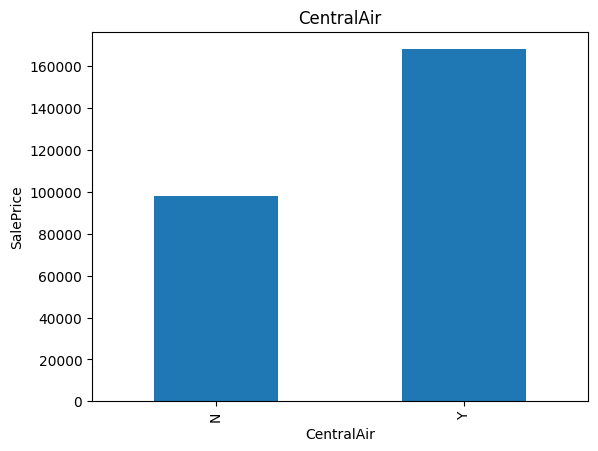

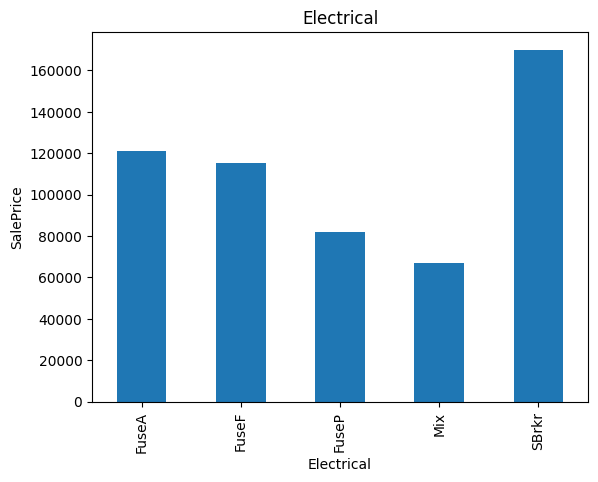

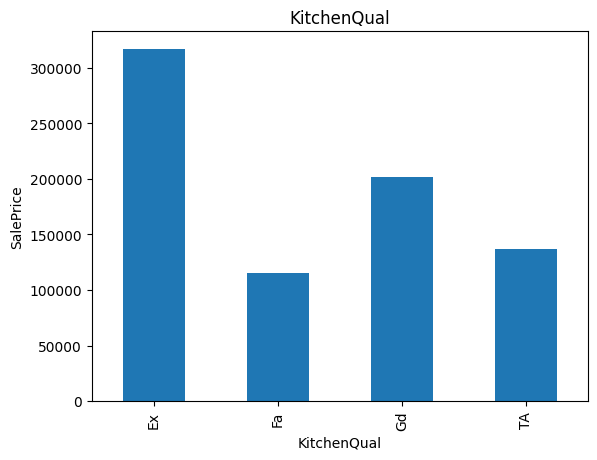

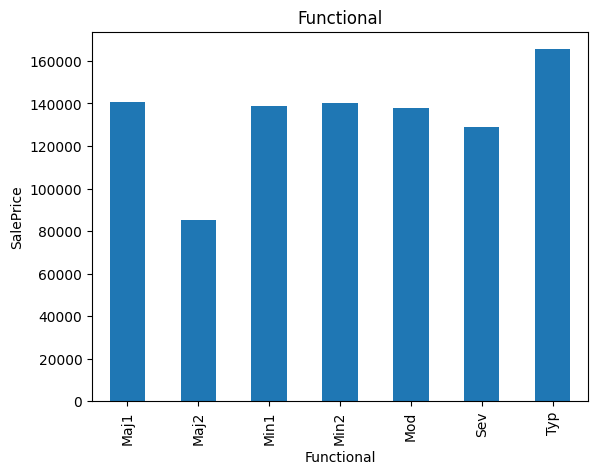

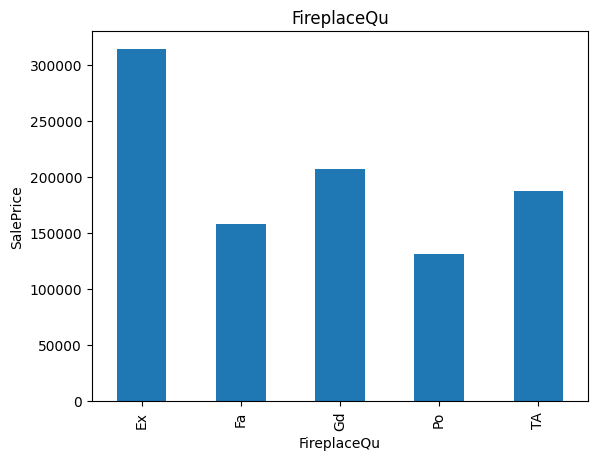

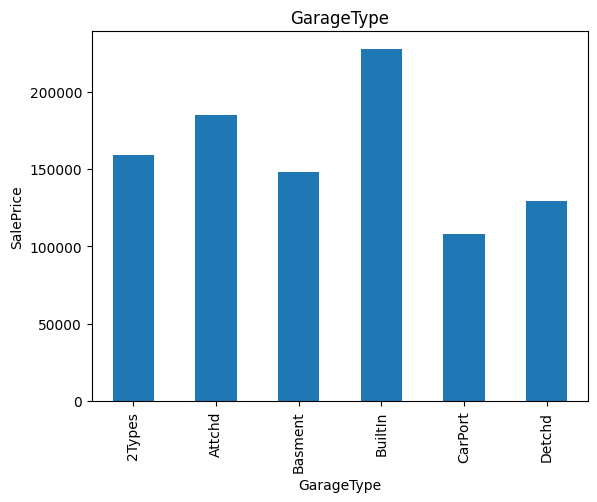

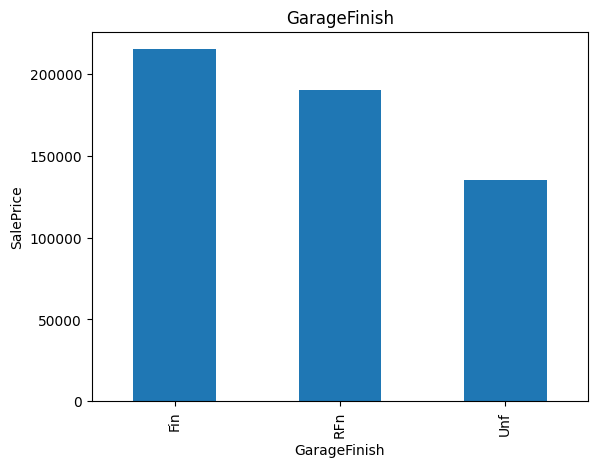

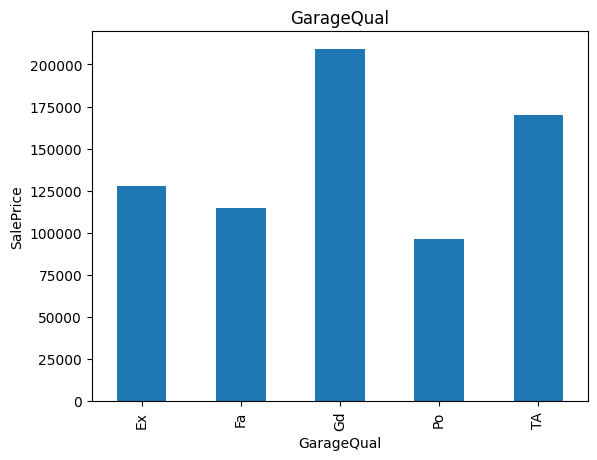

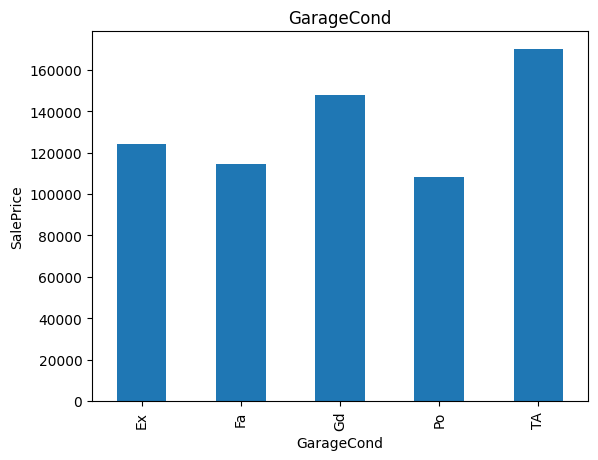

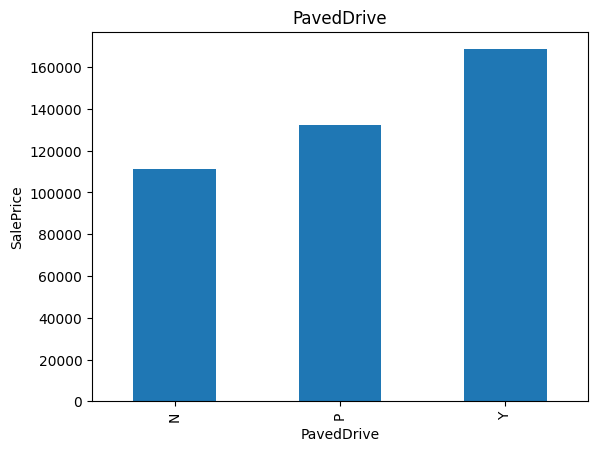

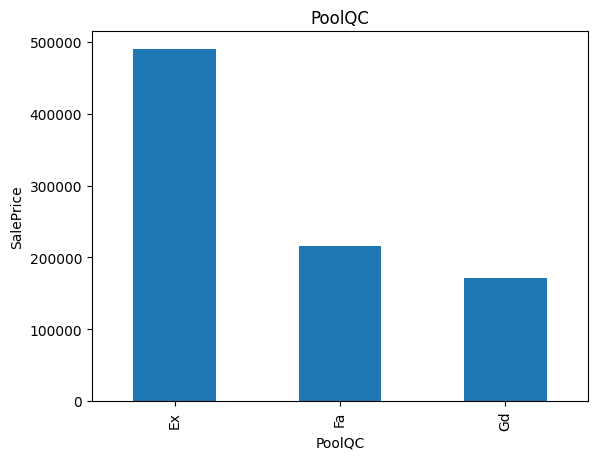

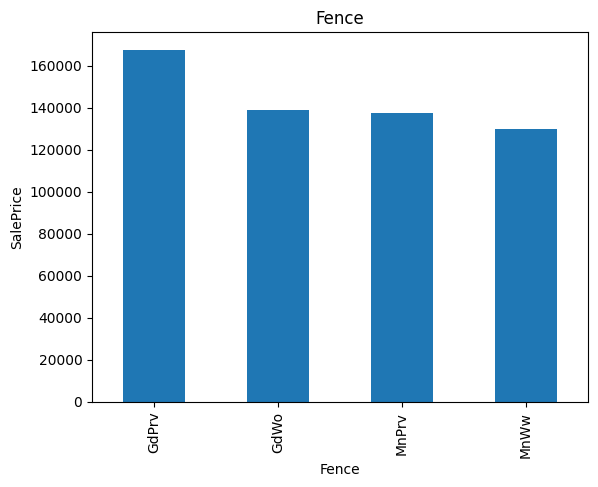

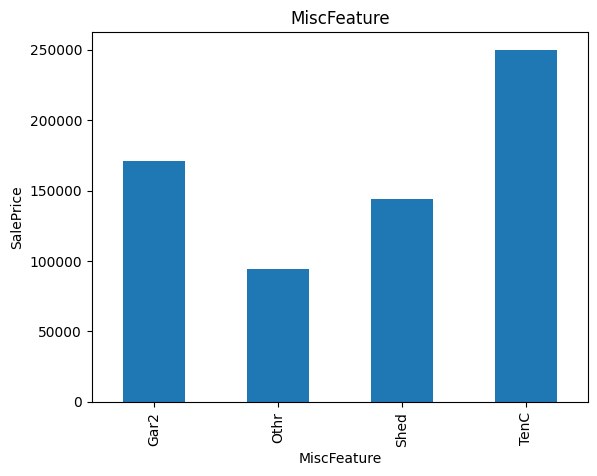

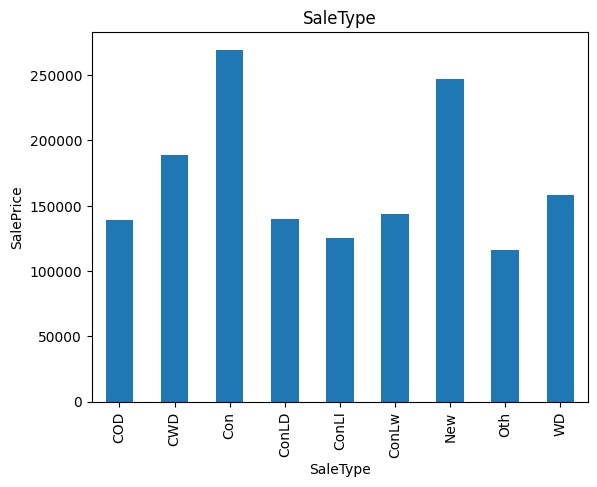

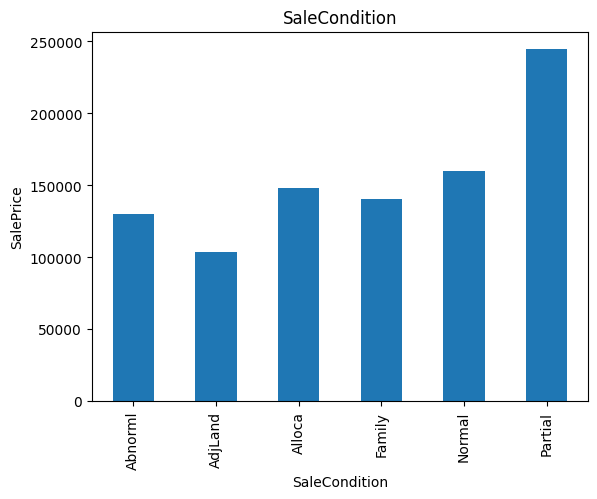

In [9]:
############### Categorical Features ################################
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [10]:
# Seperating numerical variables into discrete and continuous variables

discrete_features = [ i for i in numerical_features if len(train_data[i].unique()) < 25 and  i not in Yr_features+['Id']]

In [11]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [12]:
len(discrete_features)

17

In [13]:
continuos_features = [ i for i in numerical_features if i not in discrete_features and i not in Yr_features+['Id'] ]

In [14]:
continuos_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [15]:
len(continuos_features)

16

In [16]:
# discrete:- 17, continuous:- 16, year column:- 4, ID features:- 1 #

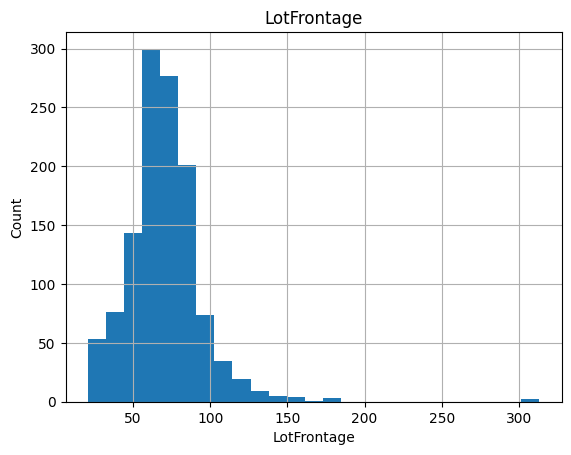

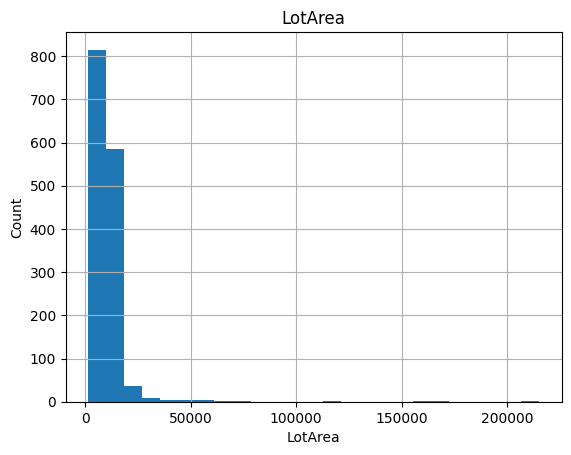

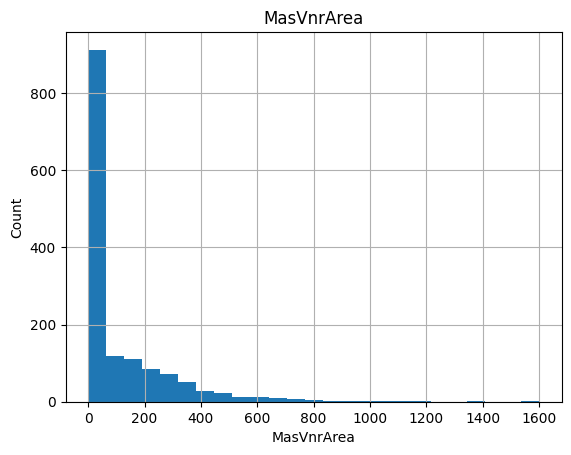

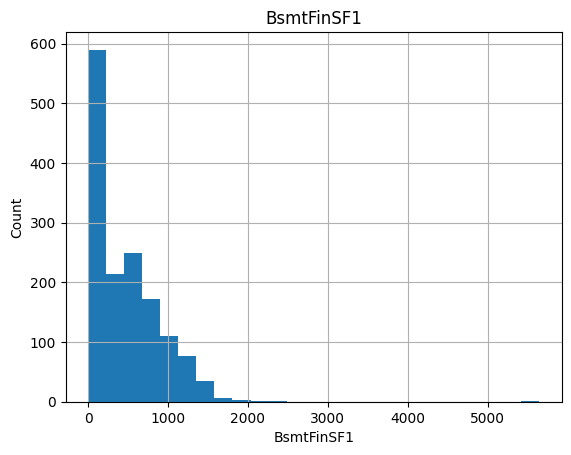

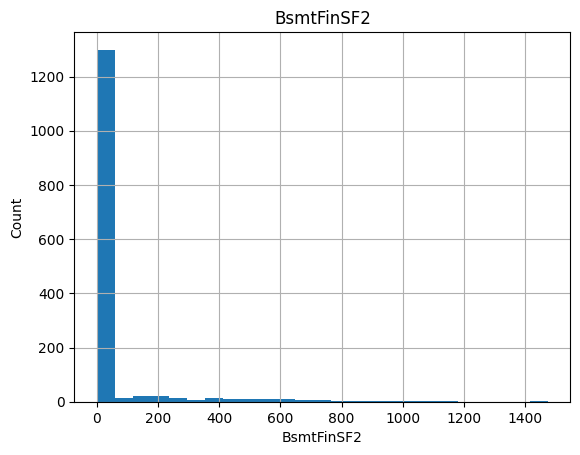

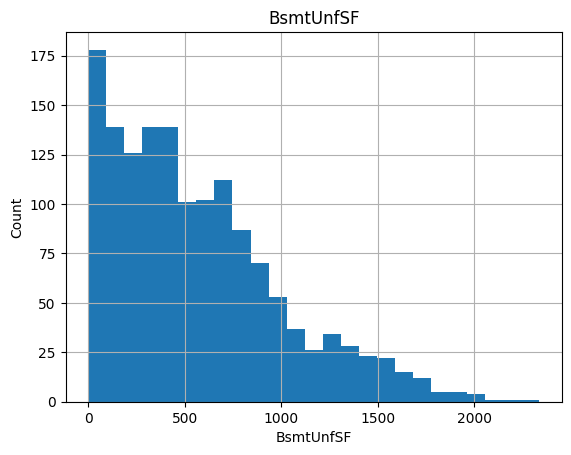

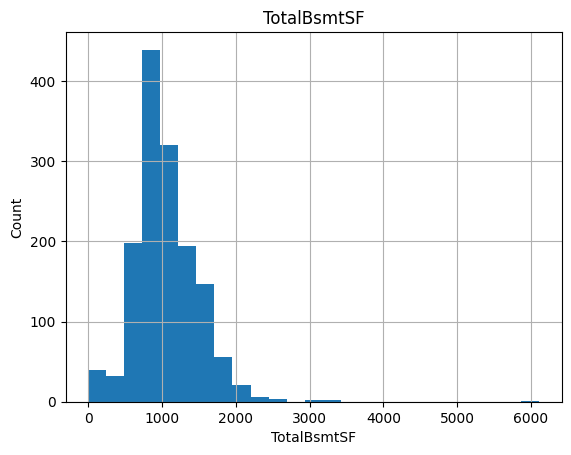

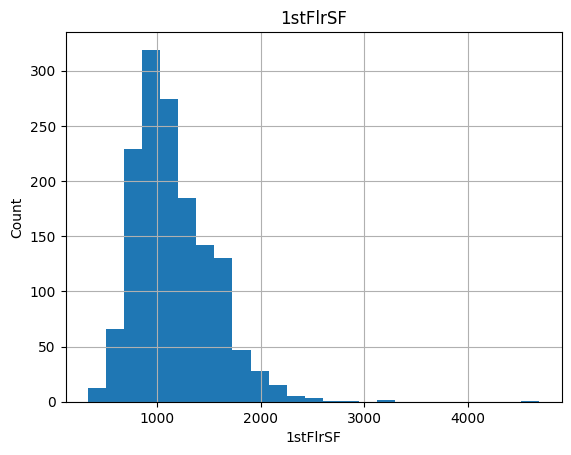

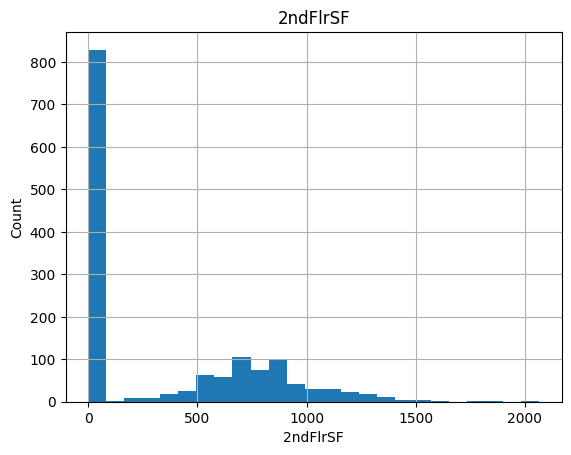

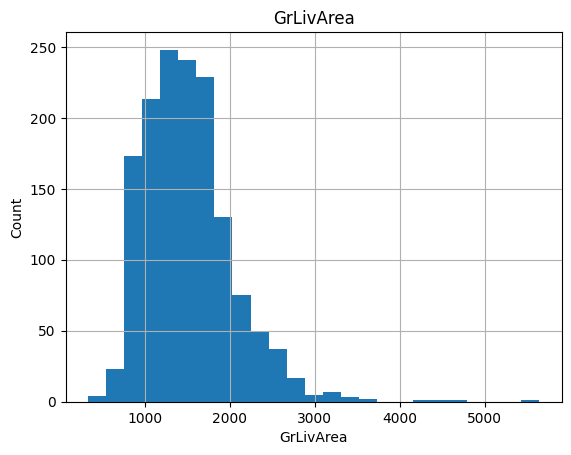

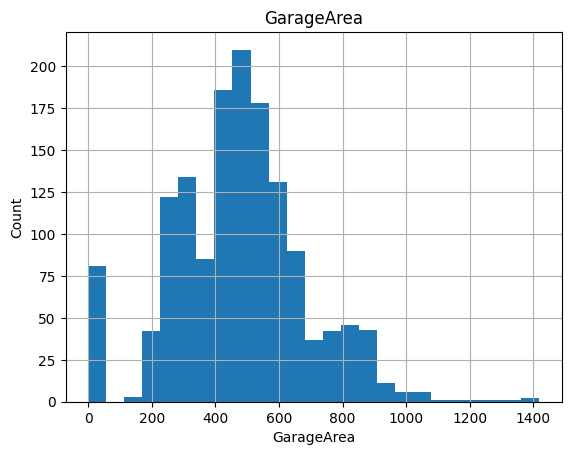

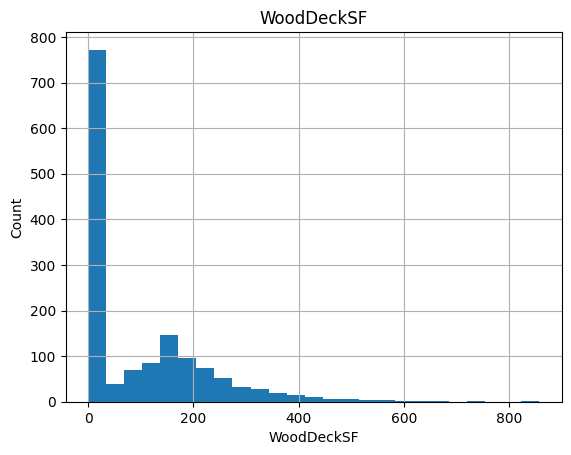

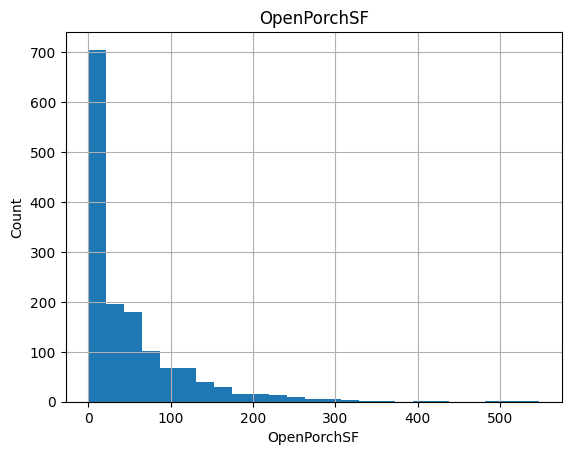

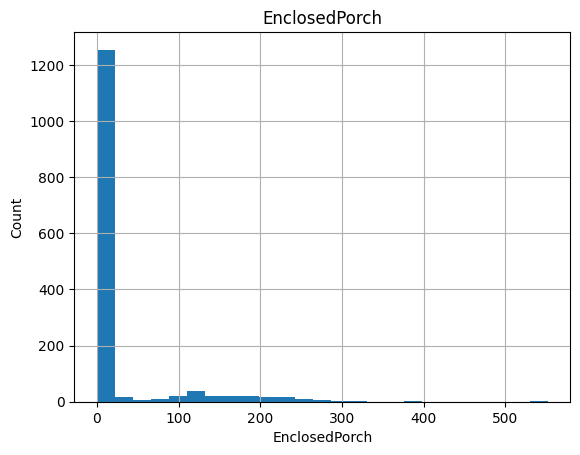

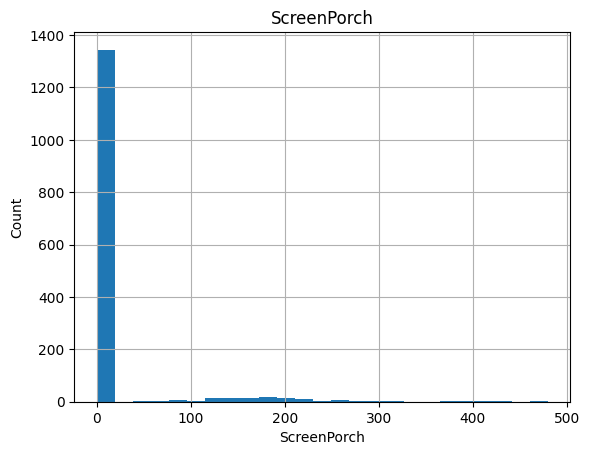

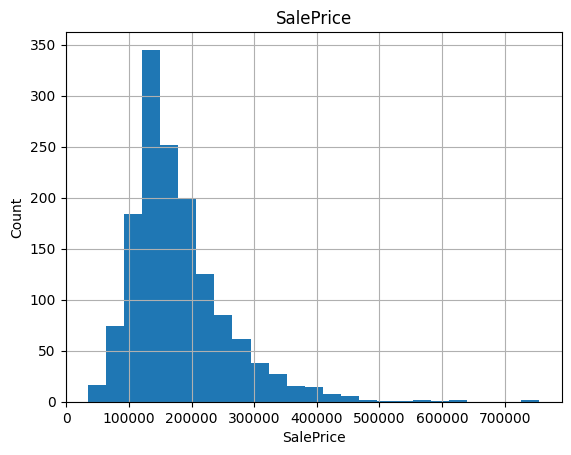

In [17]:
############### Continuos Features ################################
for feature in continuos_features:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

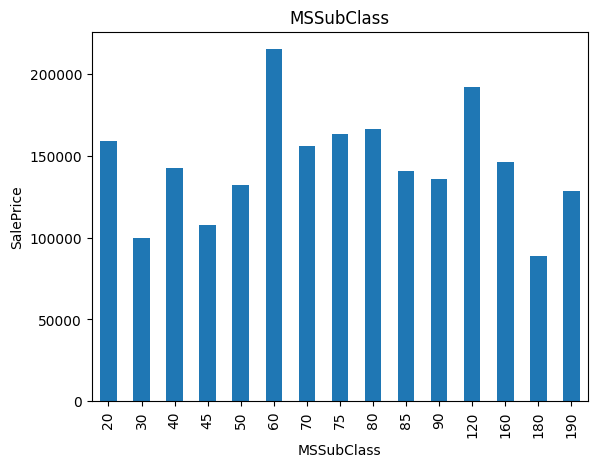

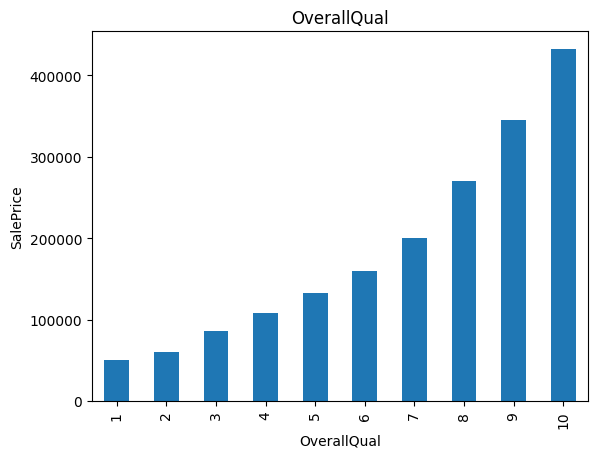

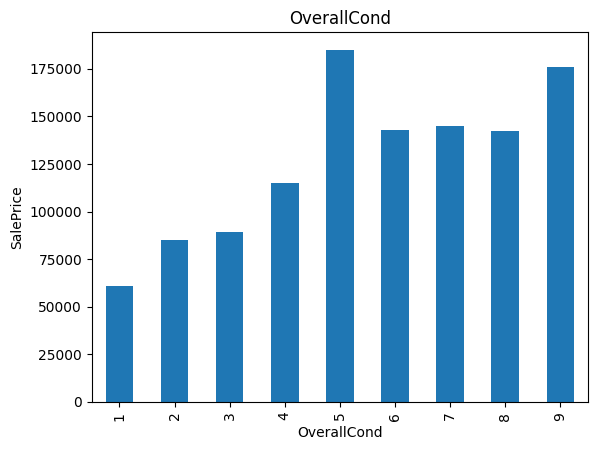

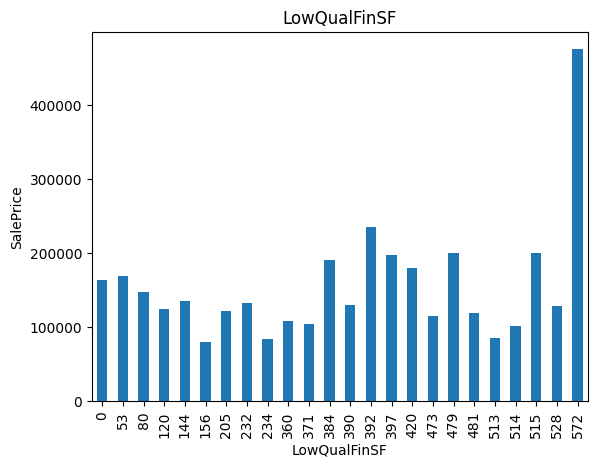

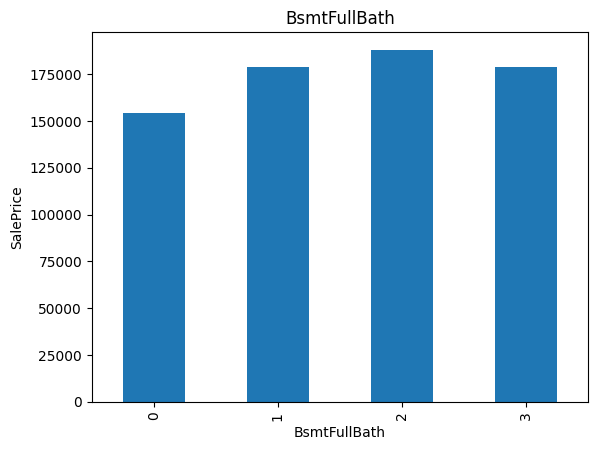

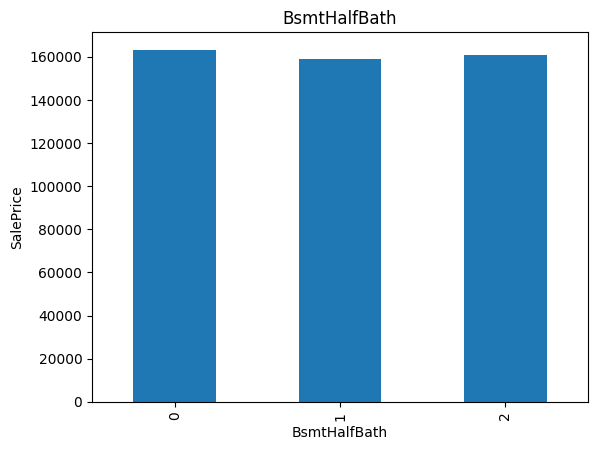

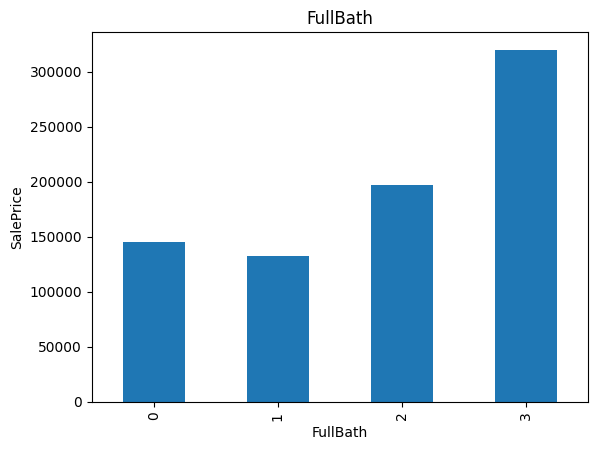

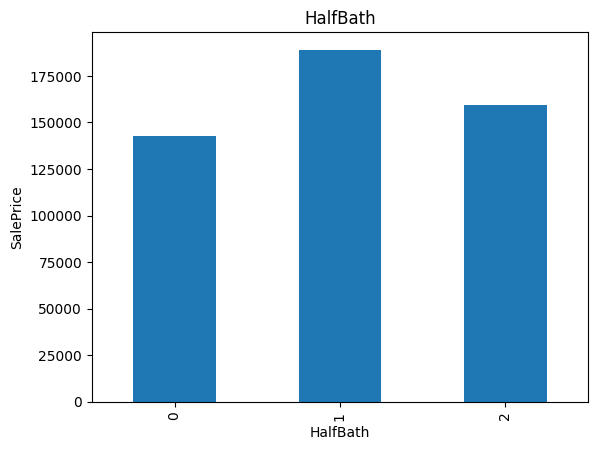

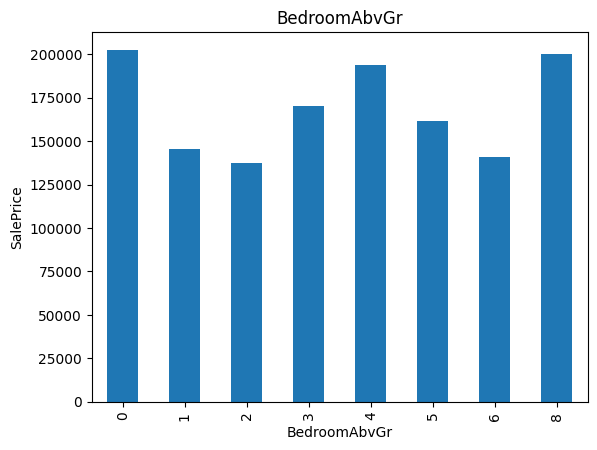

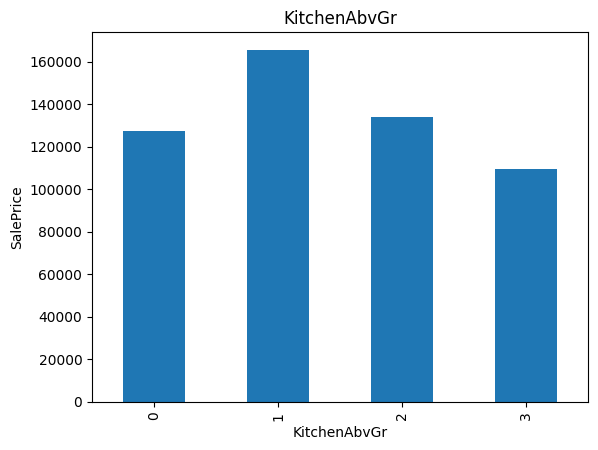

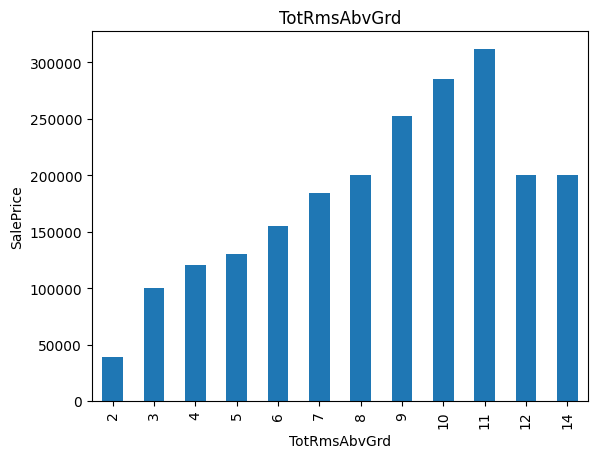

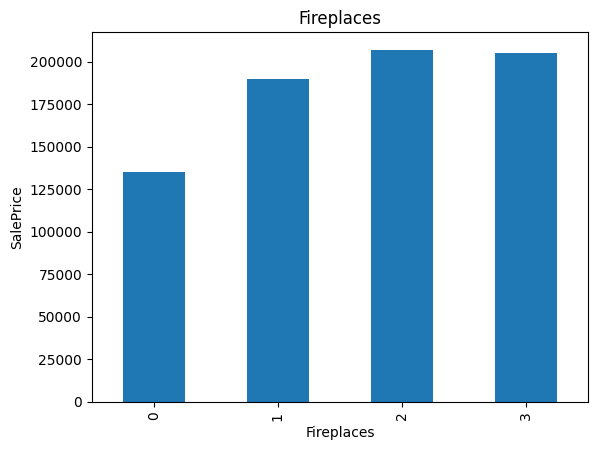

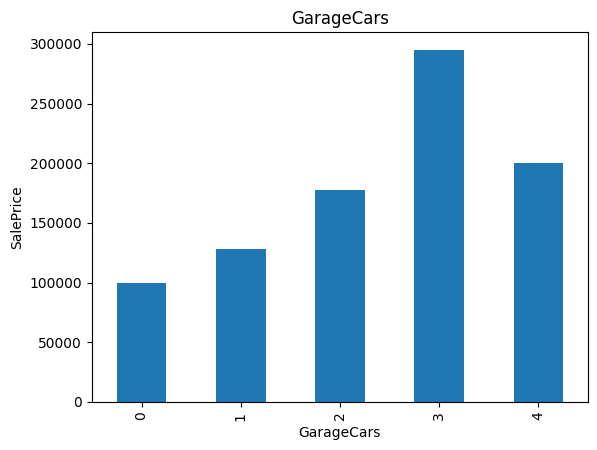

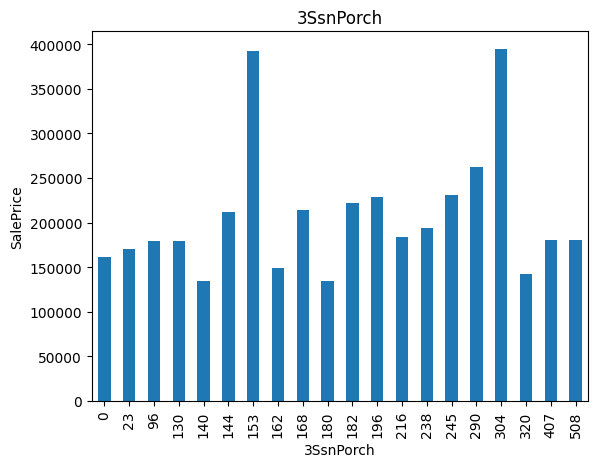

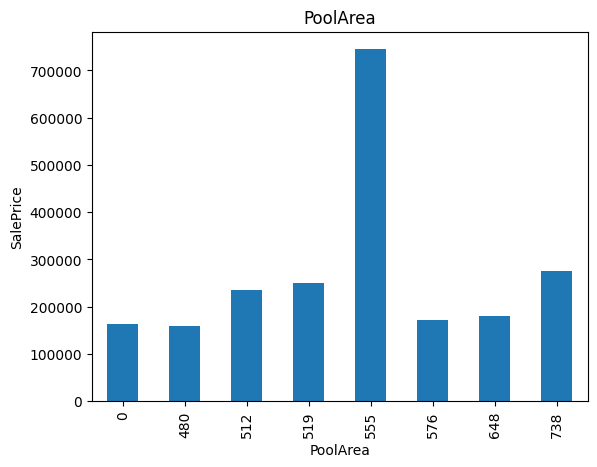

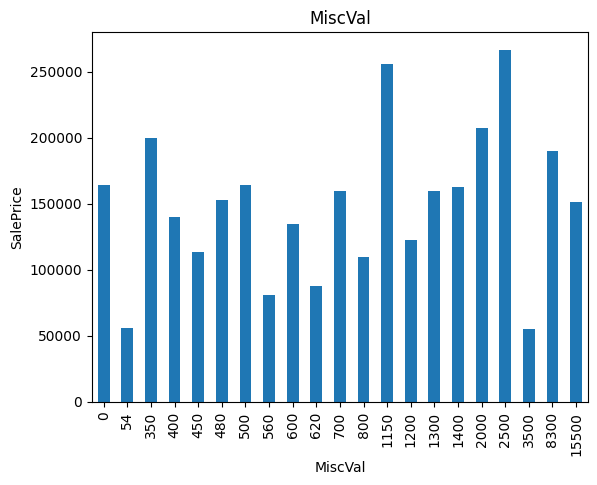

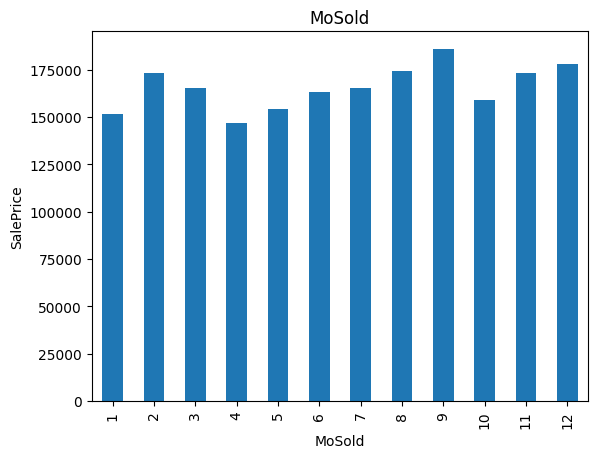

In [23]:
# All continuous variables are left skewed #

for feature in discrete_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

############### ANALYSIS ##################

1.Need to handle missing values --- imputation

2.left skewed columns in continuos variables. ---- log transformation.
